# RP2 — Discrete‑Time Dynamical Systems (DTDS): Workbook

You will:
1. Learn what a DTDS is and why we use them.
2. Work through a **progression of example models** (additive → multiplicative → logistic families).
3. Study equilibria (stable, unstable, **neutral/borderline**) and **see them** with cobwebs.
4. Build, justify, and analyze a **drug uptake/elimination** DTDS for **your assigned drug** (with lag/split dosing).
5. Answer the **Applied Math** questions inside this notebook.
6. Create a **cross‑section connection** (Life Sci / Chem / Earth Sci / Physics) with code-backed evidence.

## 1. What is a DTDS and why use one?

A **discrete‑time dynamical system** updates a quantity step‑by‑step:

$$x_{t+1}=F(x_t) \quad (t=0,1,2,\dots)$$

- $x_t$: the state at step $t$ (e.g., amount in the body).
- $F$: the **updating rule**.

**Why discrete time?** Many processes are measured hourly/daily; actions (like taking a dose) happen at discrete steps; and discrete models are easy to simulate and visualize.

## 2. Progression of example models

### 2.1 Additive model
Update: $x_{t+1} = x_t + a$ (add the same amount each step).

Starting at $x_0$, unfold a few steps:
$$x_1=x_0+a,\quad x_2=x_0+2a,\;\dots\;\Rightarrow\;x_t = x_0 + a\,t.$$

The general solution is then a line with slope $a$ and intercept $x_0$.

### 2.2 Multiplicative (geometric) model
Update: $x_{t+1} = a\,x_t$ (scale by the same factor each step).

Unfolding:
$$x_1=ax_0,\;x_2=a x_1=a^2x_0,\;\dots\;\Rightarrow\;x_t = x_0 a^t.$$

So the general solution is an exponential model with base $a$ and initial value / y-intecept $x_0$. 

### 2.3 Logistic family (rich behavior; practice for cobwebs)
The logistic model is 
$$x_{t+1}=r\,x_t(1-x_t).$$
This looks simple, but it exhibits incredibly variable behaviour as $r$ varies. 
By changing $r$, you can see fixed points, 2‑cycles, and more complex behavior. Above a certain $r$ threshold, the logistic model becomes **chaotic**.  We’ll **test your cobweb** on several $r$ values below.

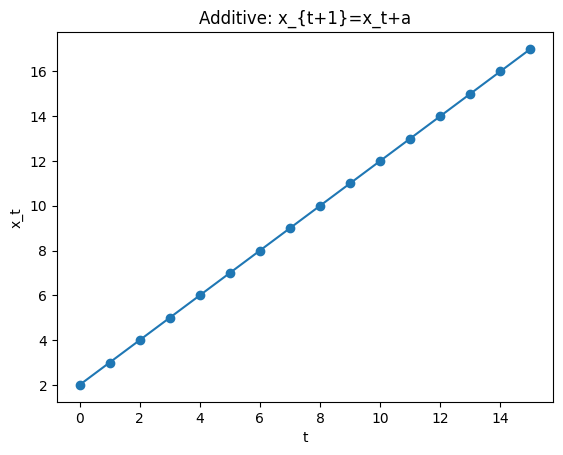

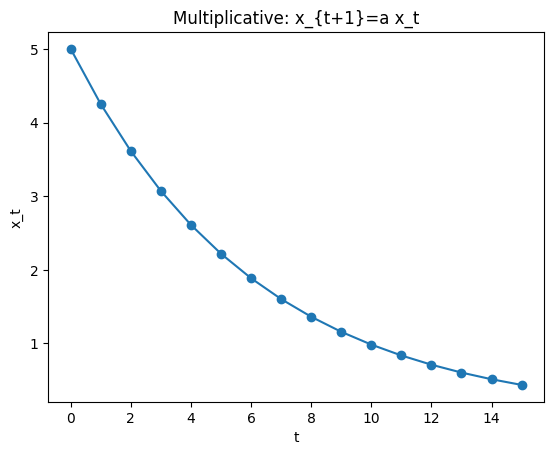

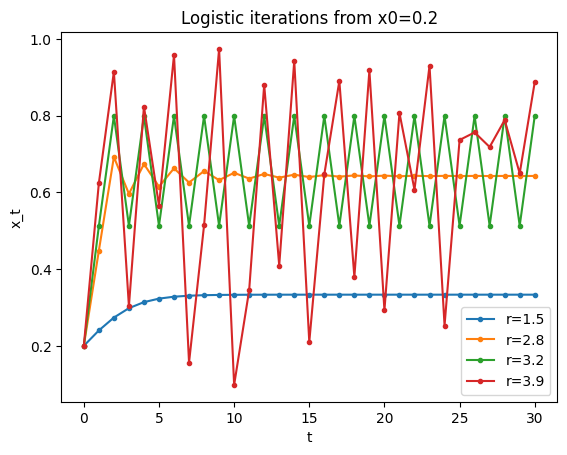

In [121]:
import numpy as np, matplotlib.pyplot as plt
t = np.arange(0, 16)
# Additive example
x0_add, a_add = 2.0, 1.0 #Change these values to see different behaviours. 
x_add = x0_add + a_add*t
plt.figure(); plt.plot(t, x_add, marker='o'); plt.xlabel('t'); plt.ylabel('x_t');
plt.title('Additive: x_{t+1}=x_t+a'); plt.show()

# Multiplicative example
x0_mul, a_mul = 5.0, 0.85 #Change a_mul to see different behaviors!!!! DO IT. DO IT NOW!
x_mul = x0_mul*(a_mul**t)
plt.figure(); plt.plot(t, x_mul, marker='o'); plt.xlabel('t'); plt.ylabel('x_t');
plt.title('Multiplicative: x_{t+1}=a x_t'); plt.show()

# Logistic sweep (trajectory-only preview)
def logistic_step(r, x): return r*x*(1-x)
for r in [1.5, 2.8,3.2, 3.9]: # This plots several trajectories for different values of r. Notice the periodicity at r=3.2 and the chaos at r=3.9
    x = 0.2; traj = [x]
    for _ in range(30): x = logistic_step(r, x); traj.append(x)
    plt.plot(traj, marker='.', label=f'r={r}')
plt.title('Logistic iterations from x0=0.2'); plt.xlabel('t'); plt.ylabel('x_t'); plt.legend(); plt.show()

## 3. Equilibria and stability (stable / unstable / **neutral**)

An **equilibrium** $x^*$ satisfies $x^*=F(x^*)$. Intuitively, an eqilibrium is a special point value $x^*$ such that if we choose it as our initial point, $x_0=x^*$, then the dynamical system stays there, $x_1=F(x^*)=x^*$, $x_2=F(x_1)=F(x^*)=x^*$,... and so on forever.

Equilibria can come in several flavours. A stable equilibrium is an equilibrium $x^*$ such that if we deviate slightly away from $x^*$, say $x_0=x^*+\varepsilon$ for a small $\epsilon$ as our initial value, then the successive $x_i$'s get closer and closer back to $x^*$ (it's an ``attractor''). As a physical example, thing of a ball in a bowl: at rest, the ball wants to stay at the lowest point at the bottom of the bowl, and if you bump it away from the bottom, it slowly rolls back and forth until it approaches the bottom again. 

What is an unstable equilibrium? Imagine a ball and a bowl again, but this time the bowl is upside down, and the ball is balancing on the outside. If you balance the ball **just** right at the highest point of the bowl, it will stay there (it's an equilibrium point!), but if you bumpt it ever so slightly, it rolls off (away from the equilibrium). An unstable equilibrium $x^*$ then is an equilibrium such that if we deviate slightly, say $x_0=x^* + \varepsilon$ for some small $\varepsilon$, then the successive $x_i$'s move away from $x_0$ (it ``repels'' them). 


Equilibria can also be more complicated, or combinations of stable/unstable depending on the direction of approach. You can also have strange periodic patterns, that feel like equilibria, but are actually called "cycles" or "orbits". 


Slope test (when $F'$ exists at $x^*$):

- $|F'(x^*)|<1$ ⇒ **stable** (nearby points move toward $x^*$).
- $|F'(x^*)|>1$ ⇒ **unstable** (move away).
- $|F'(x^*)|=1$ ⇒ **neutral/borderline** (requires deeper analysis; can be periodic or slowly drifting).



## 4. Cobweb diagrams: solving step‑by‑step when no formula exists

***Algorithm:*** Draw $y=F(x)$ and the diagonal $y=x$, then iterate:
1. **Vertical:** $(x_t, x_t) \to (x_t, F(x_t))$.
2. **Horizontal:** $(x_t, F(x_t)) \to (F(x_t), F(x_t))$.

Repeat to see convergence/divergence/periodicity. **Cobwebbing is ideal for first‑order 1D maps.**

**Higher‑order models (with lags):** If $F$ uses $A_{t}$ and $A_{t-1}$, the natural phase space is 2D; the simple 1D cobweb no longer applies directly. You can still visualize iteration with a 2D state plot or by fixing one coordinate to explore slices.


### Connection with Equilibria

A cobweb diagram is a nice way to study/visualize the equilibria of a simple dydnaical systemt $x_{t+1}=F(x_t)$. By definition, an equilibria is a "fixed point" of the system, i.e. $F(x^*)=x^*$, and so on the cobweb diagram, we can observe equilibria exactly as the points where the curves $y=x$ and $y=F(x)$ intersect, since those are exactly the values $x$ for which $x=y=F(x)\Rightarrow x=F(x)$. We can then try to study the type of equilibria they are *numerically* by choosing initial values $x_0$ *near* $x^*$ and observing how the system progresses in various cases. 

### 4.1 Static cobweb schematic (hard‑coded steps)

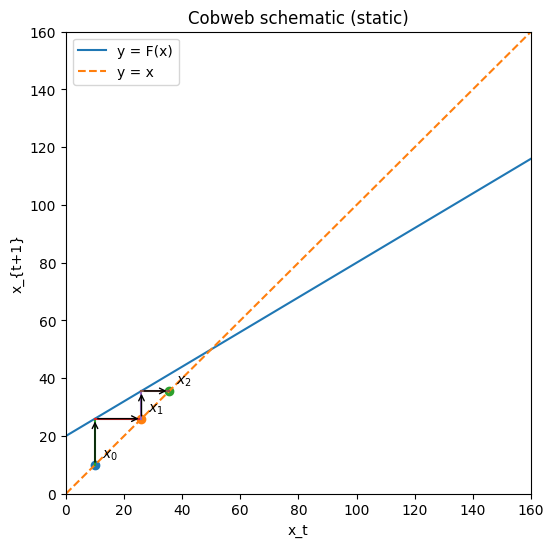

In [122]:
#DO NOT EDIT THIS CELL! This just creates a picture for you to see how the cobweb algorithm works. 

import numpy as np, matplotlib.pyplot as plt
x_min, x_max = 0.0, 160.0
xx = np.linspace(x_min, x_max, 600)
def F(x): return 0.6*x + 20.0
yy = F(xx)
x0 = 10.0
y0 = F(x0)
x1, y1 = y0, F(y0)
x2, y2 = y1, F(y1)
plt.figure(figsize=(6,6))
plt.plot(xx, yy, label='y = F(x)'); plt.plot(xx, xx, '--', label='y = x')
for (xa,ya,label) in [(x0,x0,'$x_0$'),(x1,x1,'$x_1$'),(x2,x2,'$x_2$')]:
    plt.scatter([xa],[ya]); plt.annotate(label,(xa,ya), textcoords='offset points', xytext=(5,5))
plt.plot([x0,x0],[x0,y0]); plt.annotate('', xy=(x0,y0), xytext=(x0,x0), arrowprops=dict(arrowstyle='->'))
plt.plot([x0,y0],[y0,y0]); plt.annotate('', xy=(y0,y0), xytext=(x0,y0), arrowprops=dict(arrowstyle='->'))
plt.plot([x1,x1],[x1,y1]); plt.annotate('', xy=(x1,y1), xytext=(x1,x1), arrowprops=dict(arrowstyle='->'))
plt.plot([x1,y1],[y1,y1]); plt.annotate('', xy=(y1,y1), xytext=(x1,y1), arrowprops=dict(arrowstyle='->'))
plt.xlim(x_min,x_max); plt.ylim(x_min,x_max)
plt.xlabel('x_t'); plt.ylabel('x_{t+1}')
plt.legend(); plt.title('Cobweb schematic (static)'); plt.show()

### 4.2 Build‑your‑own cobweb (scaffold)
**Describe your approach in comments, then implement.**

Steps: (i) plot $y=F(x)$ and $y=x$; (ii) start at $x_0$; (iii) vertical to $(x_0,F(x_0))$; (iv) horizontal to $(F(x_0),F(x_0))$; (v) repeat.

**Coding tip:** `plt.plot([x_start,x_end],[y_start,y_end])` draws a segment.

In [123]:
import numpy as np, matplotlib.pyplot as plt
def cobweb_plot(F, x0, n_steps=25, x_min=0.0, x_max=1.0, title='Cobweb'): #You may need to adjust the step size and x_min/x_max for your specific function F to get a good picture.
    """Scaffold (left incomplete). Implement the 1D cobweb described above for your chosen F."""
    xx = np.linspace(x_min, x_max, 600)

    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.xlabel('x_t'), plt.ylabel('x_{t+1}')

    # Plotting y = F(x) and y = x
    plt.plot(xx, F(xx), label='y = F(x)')
    plt.plot(xx, xx, linestyle = 'dotted', label='y = x')

    x = x0

    for _ in range(n_steps):

        y = F(x)

        # Drawing vertical line from (x,x) to (x,y)
        x_start, x_end = x, x
        y_start, y_end = x, y
        plt.plot([x_start, x_end], [y_start, y_end], color = 'red')

        # Drawing horizontal line from (x,y) to (y,y)
        x_start, x_end = x, y
        y_start, y_end = y, y
        plt.plot([x_start, x_end], [y_start, y_end], color = 'red')

        x = y

    plt.legend()
    plt.grid(True)

### 4.3 Observing Some equilibria on Cobweb Diagrams. 

Use your cobwebbing code to study the equilibria of the following DTDSs. Try to choose different initial values near the equilibria to study their properties. 


1. Stable: $F(x)=0.6x+20$ ($x^*=50$).
2. Unstable: $F(x)=1.2x$ ($x^*=0$ repelling).
3. Neutral periodic: $F(x)=1-x$ (fixed point 0.5 neutral; 2‑cycle behavior).

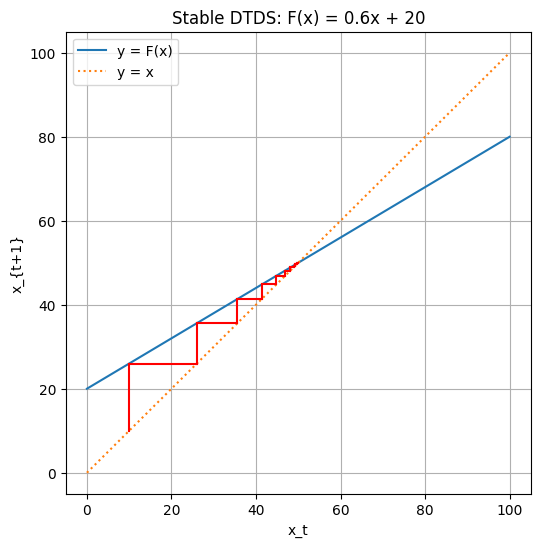

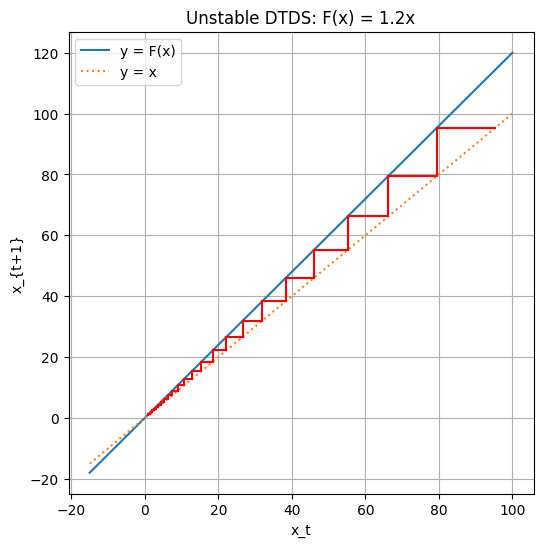

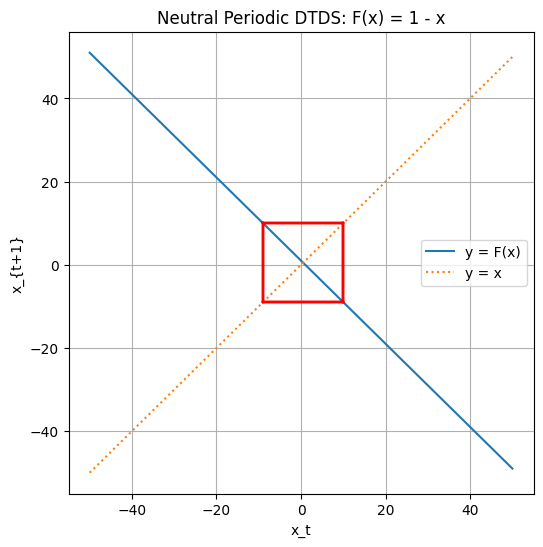

In [124]:
def F_stable(x):
    return 0.6 * x + 20
cobweb_plot(F_stable, x0=10, n_steps=25, x_min=0, x_max=100, title = 'Stable DTDS: F(x) = 0.6x + 20')
plt.show()

def F_unstable(x):
    return 1.2 * x
cobweb_plot(F_unstable, x0=1, n_steps=25, x_min=-15, x_max=100, title = 'Unstable DTDS: F(x) = 1.2x')
plt.show()

def F_neutral(x):
    return 1 - x
cobweb_plot(F_neutral, x0=10, n_steps=25, x_min=-50, x_max=50, title = 'Neutral Periodic DTDS: F(x) = 1 - x')
plt.show()



### 4.4 Cobweb practice on the logistic family
Use your cobweb on the logistic map $x_{t+1}=r x_t(1-x_t)$ for $r\in\{1.5, 2.8,3.2,3.9\}$. Start from $x_0=0.2$. Describe what you see (fixed point? 2‑cycle? something else?).

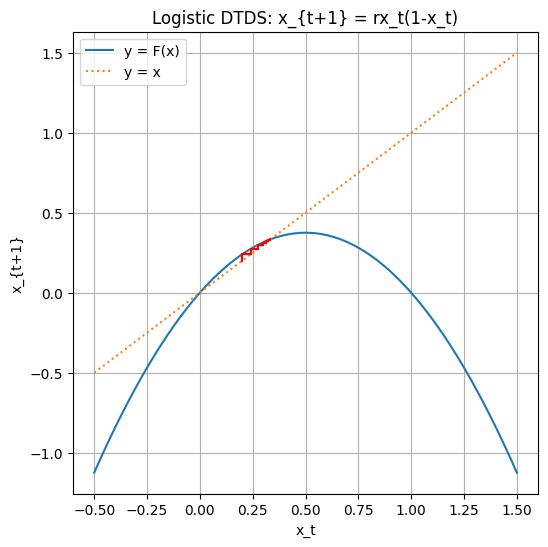

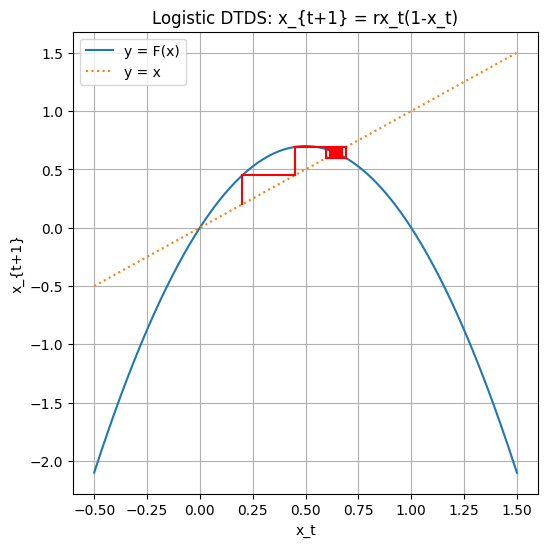

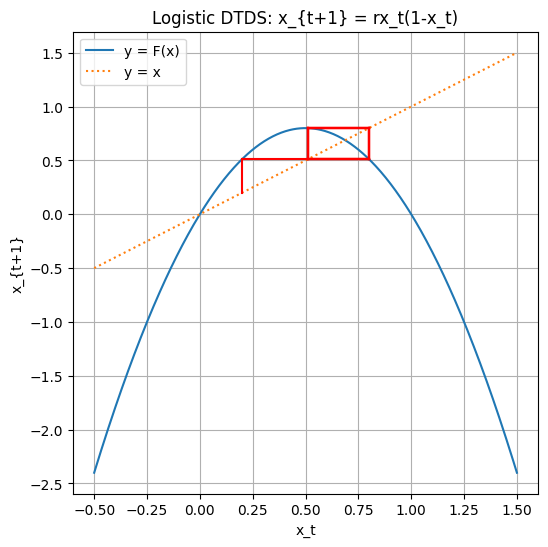

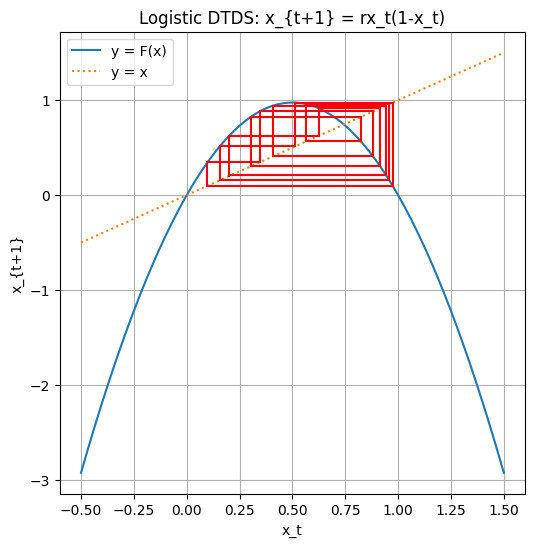

In [125]:
r_values = [1.5, 2.8, 3.2, 3.9]

for r in r_values:

    def F_logistic(x):
        return r*x*(1-x)
    cobweb_plot(F_logistic, x0=0.2, n_steps=15, x_min=-0.5, x_max=1.5, title = 'Logistic DTDS: x_{t+1} = rx_t(1-x_t)')
    plt.show()

#Cobweb for the logistic map here, looking at the various r values.

## 5. Your drug DTDS (own drug; baseline with lag/split)

Everyone must use their **assigned drug** from the Drug Card. You may refine the model if justified and kept discrete‑time.

### Baseline model
$$A_{t+1}=\rho A_t + U_{t+1},\qquad 0<\rho<1.$$
- $\rho=2^{-1/t_{1/2}}$ from the half‑life $t_{1/2}$.
- $U_{t+1}$ is built from a **dose sequence** $D_h$ using a **two‑hour absorption** with optional **lag**:
$$U_{t+1}=\text{bioavail}\,\Big[s\,D_{t+1-\text{lag}}+(1-s)\,D_{t-\text{lag}}\Big].$$

**About cobwebs here:** This model is first‑order in $A_t$, so a 1D cobweb works **if** $U_{t+1}$ is a fixed function of $t$ (e.g., same schedule). If you introduce additional state (e.g., an absorption reservoir), the system becomes higher‑order and the classic 1D cobweb doesn’t directly apply.

### Drug Card (you may replace with your own values if citing sources)
| Drug | Typical dose | Bioavailability | Half-life (h) | Lag (h) | Notes |
|---|---|---|---|---|---|
| Acid (Lysergic Acid Diethylamide; LSD) | 100 µg | ~0.7 (oral) | 3–5 h | 0.5–1 | Potent; variable oral bioavailability. |
| Anabolic steroids | 5–50 mg | 0.3–0.9 | hours–days | 0–2 | Large variation across compounds, esters. |
| Birth control pills (Oestrogen/Estradiol) | 0.02–0.05 mg | ~0.4 | 13–27 h | 0–1 | First-pass metabolism significant. |
| Cocaine | 20–50 mg | 0.3–0.9* | 0.7–1.5 h | 0–0.5 | Depends on route (*higher by non-oral routes). |
| Ecstasy (3,4-Methylenedioxymethamphetamine; MDMA) | 75–125 mg | ~0.65 | 7–9 h | 0.5–1 | Nonlinear kinetics reported at high doses. |
| Ketamine | 25–50 mg | 0.2–0.5 | 2–3 h | 0–0.5 | Route-dependent, active metabolites. |
| Xanax (Alprazolam; benzodiazepines) | 0.25–1 mg | ~0.9 | 11–16 h | 0–1 | High oral bioavailability. |
| Magic Mushrooms (Psilocybin) | 10–25 mg (psilocybin) | ~0.5 | 2–3 h (psilocin) | 0.5–1 | Conversion to psilocin; variability. |
| Marijuana (Tetrahydrocannabinol; THC) | 5–20 mg (oral) | ~0.06–0.2 | hours–days | 0.5–1 | Very low oral F; fat partitioning. |
| Nicotine | 1–2 mg (cig) | 0.2–0.8 | 1–2 h | 0–0.25 | Route-dependent; fast absorption by inhalation. |
| Adderall (Amphetamine: Dextroamphetamine) | 5–20 mg | ~0.75 | 9–14 h | 0–1 | pH-dependent renal elimination. |
| Rohypnol (Flunitrazepam) | 1–2 mg | ~0.8 | 18–26 h | 0–1 | Long half-life; benzodiazepine. |

### Helper functions 

**Design goal:** clearly separate *dosing*, *absorption*, and *system update* so you can swap/extend parts.

`rho_from_half_life(t_half_hours)`
: Returns $\rho=2^{-1/t_{1/2}}$, the per‑hour retention implied by half‑life in hours.

`make_dose_sequence(T_end, doses_at_hours)`
: Builds a discrete array `D` of length `T_end+1` where `D[h]` is the total dose at hour `h`. If multiple doses share an hour, they are summed.

`apply_absorption(D_seq, bioavail, lag_hours, split_fraction)`
: Converts raw doses `D` into absorbed input `U` using a two‑hour split controlled by `split_fraction` (`s`) and optional lag `L` in hours:
$$U_{t+1}=\text{bioavail}\,( s\,D_{t+1-L} + (1-s)\,D_{t-L} ).$$
Out‑of‑range indices are treated as 0.

`simulate_dtds(rho, U, A0)`
: Given $\rho$, input `U`, and initial amount `A0`, returns arrays of times and amounts $(t,A_t)$, iterating $A_{t+1}=\rho A_t + U_{t+1}$.

In [126]:
import numpy as np
def rho_from_half_life(t_half_hours: float) -> float:
    """Convert half-life (hours) to per-hour retention rho.
    Formula: rho = 2^(-1 / t_half). Example: t_half=6h -> rho≈2^(-1/6)."""
    return 2.0 ** (-1.0 / float(t_half_hours))
def make_dose_sequence(T_end: int, doses_at_hours):
    """Construct the discrete dose array D[0..T_end].
    - T_end (int): last hour in the simulation (inclusive).
    - doses_at_hours: iterable of (hour:int, amount:float) pairs.
    Returns: numpy array D of length T_end+1 with D[h] = sum of doses at hour h."""
    D = np.zeros(T_end + 1, dtype=float)
    for h, amount in doses_at_hours:
        if 0 <= h <= T_end:
            D[h] += float(amount)  # multiple doses at same hour add up
        # else: silently ignore out-of-range hour
    return D
def apply_absorption(D_seq: np.ndarray, bioavail: float = 1.0, lag_hours: int = 0, split_fraction: float = 1.0):
    """Compute absorbed input U from raw doses D using a two-hour split with optional lag.
    U[t+1] = bioavail*( s*D[t+1-lag] + (1-s)*D[t-lag] )
    - D_seq: numpy array of doses per hour (length T+1)
    - bioavail in [0,1]: fraction that reaches systemic circulation
    - lag_hours (int): shift in hours before absorption starts
    - split_fraction s in [0,1]: portion absorbed in the *next* hour vs the current hour
    Returns: numpy array U of same length as D_seq with U[0]=0 by convention."""
    T = len(D_seq) - 1
    U = np.zeros_like(D_seq, dtype=float)
    s = float(split_fraction); L = int(lag_hours)
    for t in range(T):
        # pick two adjacent dose bins (with lag) that feed into the next absorption bin
        a = D_seq[t + 1 - L] if 0 <= t + 1 - L <= T else 0.0
        b = D_seq[t     - L] if 0 <= t     - L <= T else 0.0
        U[t + 1] = float(bioavail) * (s * a + (1.0 - s) * b)
    return U
def simulate_dtds(rho: float, U: np.ndarray, A0: float = 0.0):
    """Simulate A_{t+1} = rho*A_t + U_{t+1} for t=0..T-1.
    - rho in (0,1): per-hour retention
    - U: absorbed input per hour, length T+1 (with U[0]=0)
    - A0: initial amount at t=0
    Returns: (t_array, A_array) of length T+1."""
    T = len(U) - 1
    A = np.zeros(T + 1, dtype=float)
    A[0] = float(A0)
    for t in range(T):
        A[t + 1] = rho * A[t] + U[t + 1]
    return np.arange(T + 1), A

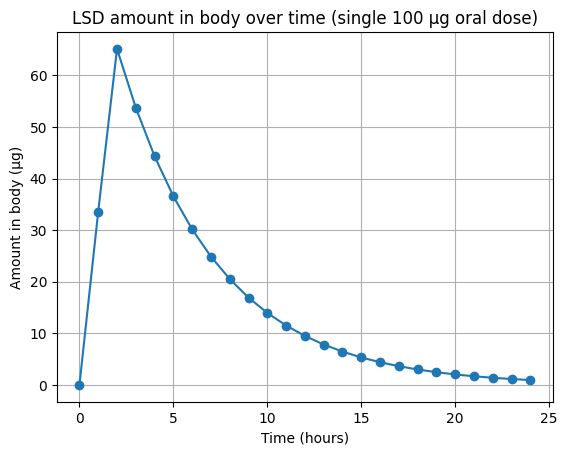

In [127]:
# Drug and model parameters (shared among all scenarios)
half_life = 3.6 # hours (midpoint of 3-5 hrs)
bioavail = 0.71 # Oral bioavailability
lag_hours = 1 # hours (midpoint of 0.5-1 hrs)
split_fraction = 0.4733 # 47.33% absorbed each hour
dose_amt = 100 # micrograms
T_end = 24 # Simulation model for 24 hours
doses = [(0, dose_amt)] # creates list of

# Calculation for array of times and respective amounts
D_seq = make_dose_sequence(T_end, doses)
U = apply_absorption(D_seq, bioavail, lag_hours, split_fraction)
rho = rho_from_half_life(half_life)
t, A = simulate_dtds(rho, U, A0 = 0) # t = time (hours), A = amount in body (µg)

# Plot creation
plt.figure()
plt.plot(t, A, marker='o')
plt.title("LSD amount in body over time (single 100 µg oral dose)")
plt.xlabel("Time (hours)")
plt.ylabel("Amount in body (µg)")
plt.grid(True)
plt.show()

## 6. Applied Math — Complete all parts for your drug

### You can add code cells as needed.

**(a) Model proposal (baseline or justified variant).**
- Write your updating rule clearly (e.g., baseline above or a justified variant, more sophisticated variant such as a non-linear updating function, or a2‑compartment DTDS with a gut reservoir state).
- Define **every parameter** (units, biological meaning). Explain why the values are reasonable for your drug. Ensure that your units make sense!!

**(b) Parameter ranges with sources (table).**
- For each parameter (half‑life → $\rho$, bioavailability, lag, split), provide a realistic range and **one short citation**. In 2–4 sentences, justify your chosen working value inside that range.

**(c) Dosing scenarios (≥ 2).**
- Specify at least two schedules (times & amounts) that are realistic for your drug.
- Construct `D` and then `U` with your chosen bioavailability/lag/split.
- Simulate and plot $A_t$ for each scenario; label peaks and annotate the time‑to‑safe threshold you define in (e).

**(d) Equilibria & stability (qualitative).**
- Under a constant‑rate input (e.g., same dose every $k$ hours), does your model have an equilibrium value $A^*$? If yes, find it and classify **stable/unstable/neutral** (argue using slope or a small‑perturbation simulation). Include a cobweb for a simplified 1D case if applicable.

**(e) Time‑to‑safe and peak analysis.**
- Define a safety threshold for your drug (with a short citation). After a given peak, estimate hours to drop below threshold. Explain assumptions (for instance, ignoring new inputs → geometric decay $\approx \rho^k A$).

**(f) Sensitivity to a parameter.**
- Sweep one parameter (e.g., bioavailability from 0.3→0.9) and plot how **peak $A_t$** and **time‑to‑safe** change. Write 3–5 sentences interpreting what the slopes/curves mean practically.

**(g) Inverse update (conceptual).**
- For an affine step $A_{t+1}=\rho A_t + b_t$, the formal inverse is $A_t=(A_{t+1}-b_t)/\rho$. Discuss feasibility (nonnegativity, bounds). If you introduce nonlinearities or extra states, is the inverse unique? Explain.

**(h) Reflection (limitations & next steps).**
- Name one limitation of your model for this drug and propose a feasible improvement for a future version.

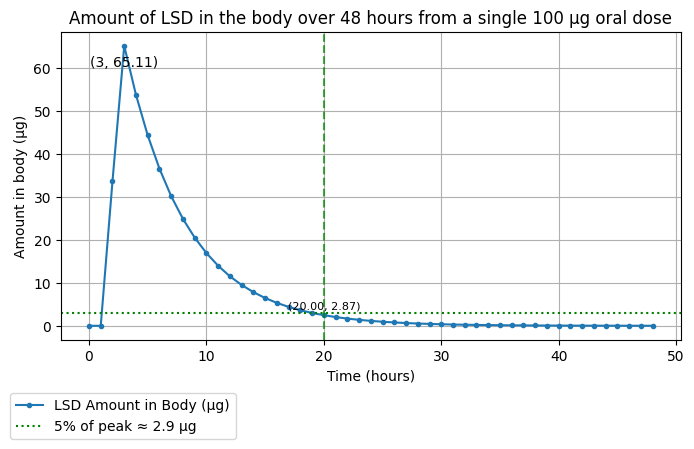

In [128]:
safety_fraction = 0.044

# Dosing Scenario 1 - one single 100 µg dose, modelled over 2 days
dose1 = 100
T_end1 = 48
doses1 = [(lag_hours, dose1)]

D1 = make_dose_sequence(T_end1, doses1) # Dose sequence
U1 = apply_absorption(D1, bioavail, lag_hours, split_fraction) # Absorbed sequence
t1, A1 = simulate_dtds(rho, U1, A0 = 0) # Simulate A_{t+1} = rho*A_t + U_{t+1}

peak1 = np.argmax(A1)
t_peak1 = t1[peak1]
A_peak1 = A1[peak1]

# safety threshold & time-to-safe
A_safe1 = safety_fraction * A_peak1
safe1 = np.where(A1 <= A_safe1)[0]
t_safe1 = t1[safe1[0]] if len(safe1) > 0 else np.nan


plt.figure(figsize=(8,4))
plt.plot(t1, A1, "-o", markersize=3, label = "LSD Amount in Body (µg)")
plt.annotate("(" + str(round(t_peak1, 2)) + ", " + str(round(A_peak1, 2)) + ")", (t_peak1, A_peak1), textcoords="offset points", xytext=(0,-15), ha='center')
plt.axhline(A_safe1, color="green", linestyle=":", label=f"5% of peak ≈ {A_safe1:.1f} µg")

t_safes = [t1[i] for i in range(1, len(A1)) if A1[i-1] > A_safe1 and A1[i] <= A_safe1]
for t_cross in t_safes:
    plt.axvline(t_cross, color="green", linestyle="--", alpha=0.7)
    plt.annotate(f"({t_cross:.2f}, {A_safe1:.2f})", xy=(t_cross, A_safe1), xytext=(t_cross, A_safe1+1), fontsize=8, ha='center')

plt.title("Amount of LSD in the body over 48 hours from a single 100 µg oral dose")
plt.xlabel("Time (hours)")
plt.ylabel("Amount in body (µg)")
plt.legend(loc = 'upper center', bbox_to_anchor = (0.1, -0.15))
plt.grid(True)
plt.show()

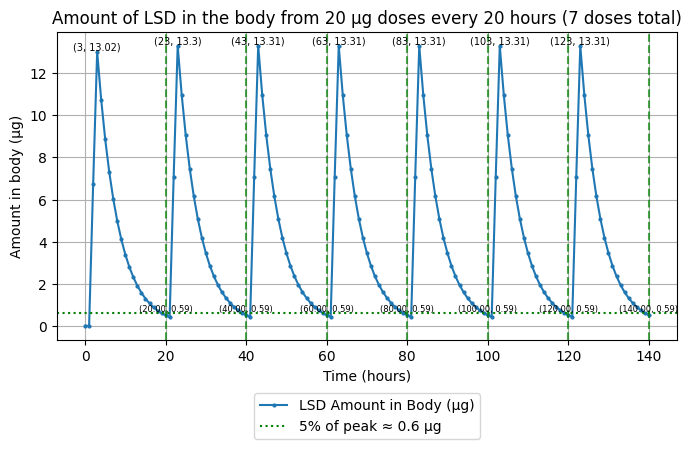

In [129]:
# Dosing Scenario 2 - 20 µg dose every day, modelled over 10 days
dose2 = 20 # µg
interval = 20 # every 12 hours
T_end2 = 7*20 # simulate 7 doses
doses2 = [(t, dose2) for t in range(lag_hours, T_end2+1, interval)]

D2 = make_dose_sequence(T_end2, doses2)
U2 = apply_absorption(D2, bioavail, lag_hours, ((dose2*0.71)/1.5)/dose2) # average rate to achieve maximal concentration divided by the dose amount gives the split fraction
t2, A2 = simulate_dtds(rho, U2, A0 = 0.0)

peak2 = np.argmax(A2)
t_peak2 = t2[peak2]
A_peak2 = A2[peak2]

A_safe2 = safety_fraction * A_peak2
safe2 = np.where(A2 <= A_safe2)[0]
t_safe2 = t2[safe2[0]] if len(safe2) > 0 else np.nan

plt.figure(figsize=(8,4))
plt.plot(t2, A2, "-o", markersize=2, label = "LSD Amount in Body (µg)")
plt.axhline(A_safe2, color="green", linestyle=":", label=f"5% of peak ≈ {A_safe2:.1f} µg")

t_safes = [t2[i] for i in range(1, len(A2)) if A2[i-1] > A_safe2 and A2[i] <= A_safe2]
for t_cross in t_safes:
    plt.axvline(t_cross, color="green", linestyle="--", alpha=0.7)
    plt.annotate(f"({t_cross:.2f}, {A_safe2:.2f})", xy=(t_cross, A_safe2), xytext=(t_cross, A_safe2+0.1), fontsize=6, ha='center')

for i in range(1, len(A2)-1):
    if A2[i] > A2[i-1] and A2[i] > A2[i+1]:  # Peak detection
        plt.annotate(f"({t2[i]}, {round(A2[i],2)})", xy=(t2[i], A2[i]), xytext=(t2[i], A2[i] + 0.1), fontsize=7, ha='center')

plt.title("Amount of LSD in the body from 20 µg doses every 20 hours (7 doses total)")
plt.xlabel("Time (hours)")
plt.ylabel("Amount in body (µg)")
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15))
plt.grid(True)
plt.show()

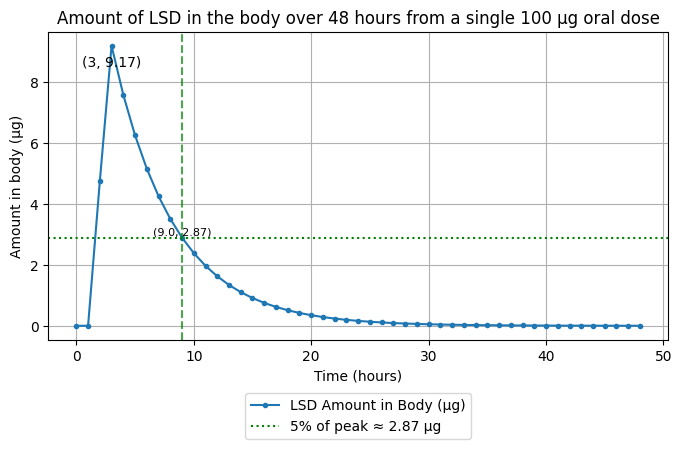

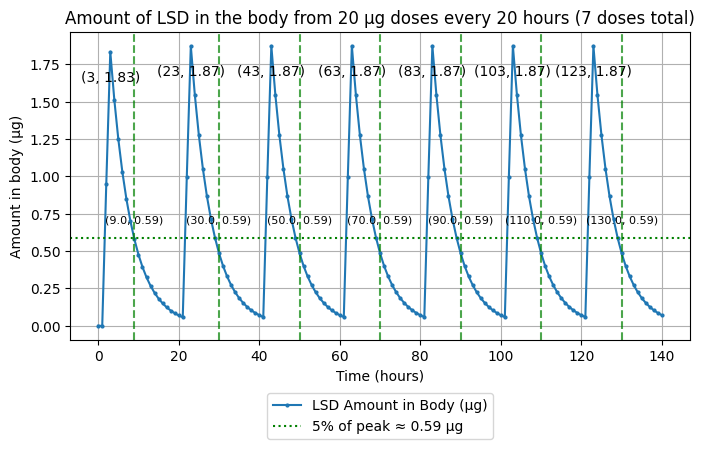

In [144]:
# PARAMETER SWEEP (BIOAVAILABILITY)

bioavail_new = 0.1 # changed from the actual value of 0.71

# Dosing Scenario 1 - one single 100 µg dose, modelled over 2 days
dose1 = 100
T_end1 = 48
doses1 = [(lag_hours, dose1)]

D1 = make_dose_sequence(T_end1, doses1) # Dose sequence
U1 = apply_absorption(D1, bioavail_new, lag_hours, split_fraction) # Absorbed sequence
t1, A1 = simulate_dtds(rho, U1, A0 = 0) # Simulate A_{t+1} = rho*A_t + U_{t+1}

peak1 = np.argmax(A1)
t_peak1 = t1[peak1]
A_peak1 = A1[peak1]

# safety threshold & time-to-safe
A_safe1 = safety_fraction * A_peak1
safe1 = np.where(A1 <= A_safe1)[0]
t_safe1 = t1[safe1[0]] if len(safe1) > 0 else np.nan


plt.figure(figsize=(8,4))
plt.plot(t1, A1, "-o", markersize=3, label = "LSD Amount in Body (µg)")
plt.annotate("(" + str(round(t_peak1, 2)) + ", " + str(round(A_peak1, 2)) + ")", (t_peak1, A_peak1), textcoords="offset points", xytext=(0,-15), ha='center')
plt.axhline(2.87, color="green", linestyle=":", label=f"5% of peak ≈ 2.87 µg")

threshold1 = 2.87 # Safety threshold

t_safes = []
for i in range(1, len(A1)):
    # look for where the curve goes from above threshold to below it
    if A1[i-1] > threshold1 and A1[i] <= threshold1:
        # linear interpolation to estimate the exact crossing time
        t_cross = t1[i-1] + (threshold1 - A1[i-1]) * (t1[i] - t1[i-1]) / (A1[i] - A1[i-1])
        t_safes.append(t_cross)

for t_cross in t_safes:
    plt.axvline(t_cross, color="green", linestyle="--", alpha=0.7)
    plt.annotate(
        f"({t_cross:.1f}, {threshold1:.2f})",
        xy=(t_cross, threshold1),
        xytext=(t_cross, threshold1 + 0.1),
        fontsize=8,
        ha="center"
    )

plt.title("Amount of LSD in the body over 48 hours from a single 100 µg oral dose")
plt.xlabel("Time (hours)")
plt.ylabel("Amount in body (µg)")
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15))
plt.grid(True)
plt.show()

# Dosing Scenario 2 - 20 µg dose every 1 day, modelled over 7 days
dose2 = 20 # µg
interval = 20 # every 24 hours
T_end2 = 7*20 # simulate 7 doses
doses2 = [(t, dose2) for t in range(lag_hours, T_end2+1, interval)]

D2 = make_dose_sequence(T_end2, doses2)
U2 = apply_absorption(D2, bioavail_new, lag_hours, ((dose2*0.71)/1.5)/dose2) # average rate to achieve maximal concentration divided by the dose amount gives the split fraction
t2, A2 = simulate_dtds(rho, U2, A0 = 0.0)

peak2 = np.argmax(A2)
t_peak2 = t2[peak2]
A_peak2 = A2[peak2]

A_safe2 = safety_fraction * A_peak2
safe2 = np.where(A2 <= A_safe2)[0]
t_safe2 = t2[safe2[0]] if len(safe2) > 0 else np.nan

plt.figure(figsize=(8,4))
plt.plot(t2, A2, "-o", markersize=2, label = "LSD Amount in Body (µg)")
plt.axhline(0.59, color="green", linestyle=":", label=f"5% of peak ≈ 0.59 µg")

threshold2 = 0.59 # Safety threshold

t_safes = [
    t2[i] for i in range(1, len(A2))
    if A2[i-1] > threshold2 and A2[i] <= threshold2
]

for t_cross in t_safes:
    plt.axvline(t_cross, color="green", linestyle="--", alpha=0.7)
    plt.annotate(f"({t_cross:.1f}, {threshold2:.2f})",
                 xy=(t_cross, threshold2),
                 xytext=(t_cross, threshold2+0.1),
                 fontsize=8, ha='center')

for i in range(1, len(A2)-1):
    if A2[i] > A2[i-1] and A2[i] > A2[i+1]:  # Peak detection
        plt.annotate(f"({t2[i]}, {round(A2[i],2)})", xy=(t2[i], A2[i]), xytext=(t2[i], A2[i] - 0.2), fontsize=10, ha='center')

plt.title("Amount of LSD in the body from 20 µg doses every 20 hours (7 doses total)")
plt.xlabel("Time (hours)")
plt.ylabel("Amount in body (µg)")
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15))
plt.grid(True)
plt.show()

## 7. Choose one cross‑section connection (with code & narrative)

Pick **one** option or propose your own. Provide **(i)** a small amount of code that produces a figure/table and **(ii)** a written explanation.

### A. Applied Life Science — Homeostasis/feedback
**Goal:** Relate $\rho$ and $U$ to adaptation (tolerance/withdrawal).
- Code task: Run two 7‑day simulations: baseline vs **15% faster elimination** (smaller $\rho$). Keep dosing the same. Plot both $A_t$ curves, label peaks and time‑to‑safe. Compute the difference in average exposure.
- Write‑up (≈150–200 words): Explain how changing $\rho$ affects steady state vs peaks, and what that implies for homeostatic adaptation.

### B. Applied Chemistry — $\log P/\log D_{7.4}$ and bioavailability
**Goal:** Connect chemical properties to your `bioavailability`.
- Code task: Write a function that sweeps `bioavailability` over a realistic range for your drug (e.g., 0.3–0.9). For a fixed dosing plan, re‑simulate and compute **peak $A_t$** and **time‑to‑safe** for each value; plot both vs `bioavailability`.
- Write‑up (≈150–200 words): Using a quick literature look on **lipophilicity** and **ionization** (e.g., $\log P/\log D_{7.4}$), argue what a plausible range is for your drug and interpret the sensitivity plot.
- Hint: $\log D_{7.4}$ differs from $\log P$ by accounting for ionization at pH 7.4; more ionized → lower membrane permeability → lower effective `bioavailability`.

### C. Applied Earth Science — Two‑box environmental DTDS
**Goal:** Map personal pharmacokinetics to a simple environmental fate model.
- Code task: Build a 2‑box model (Water, Sediment) driven by your **excreted** amount (you may approximate excretion as proportional to $A_t$ or to $(1-\rho)A_t$). Include exchange and loss rates, then plot both boxes over time for a day‑level input.
- Write‑up (≈150–200 words): Explain how **residence time** in each box relates to your $\rho$ and why peaks/timing matter for sampling.

### D. Applied Physics — Stock–leak analogy and inverse sensitivity
**Goal:** Show why the inverse step is ill‑conditioned for dissipative systems.
- Code task: Add Gaussian noise (you can use your choice of Python package to introduce randomness, for example, in numpy, you can use `gaussian_noise = np.random.normal(mean, std_deviation, shape)`, where `shape` is the size of the numpy array you want full of noise) to $A_{t+1}$ and attempt a one‑step inverse estimate $\hat A_t=(A_{t+1}-b_t)/\rho$. Vary noise standard deviation and show how the reconstruction error grows. Include a plot of error vs noise.
- Write‑up (≈150–200 words): Explain time‑reversal of dissipation and why the inverse is noise‑amplifying.

### E. Propose your own connection
Submit a 2–3 sentence plan; once approved, include a small code artifact (plot/table) and a 150–200 word explanation.

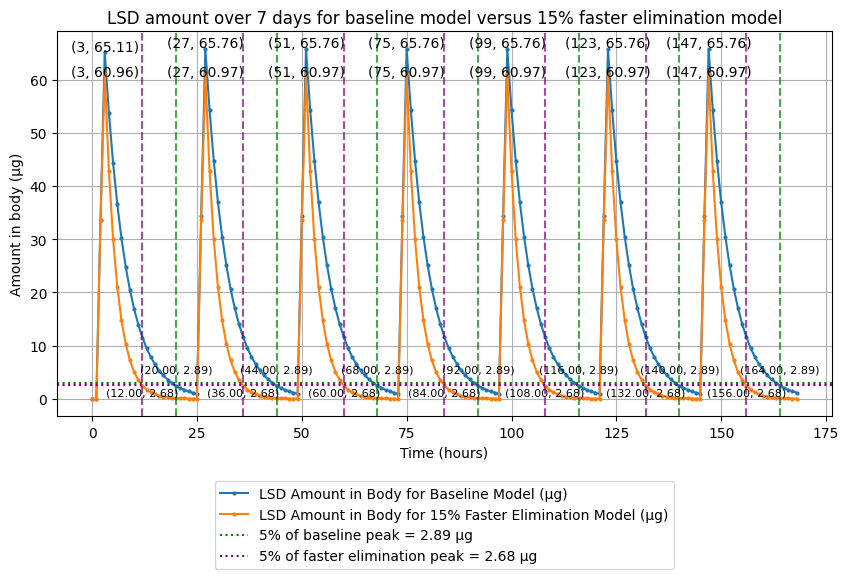

Average exposure for baseline model = 2831.73 µg*h
Average exposure for 15% faster elimination model = 1662.84 µg*h
Difference = 1168.89 µg*h


In [136]:
T_days = 7
T_end3 = T_days * 24 # 7 days in hours
dose3 = 100
safety_fraction = 0.044

# Dosing schedule - 100 µg every 24 hours
doses3 = [(t, dose3) for t in range(lag_hours, T_end3+1, 24)]
D3 = make_dose_sequence(T_end3, doses3)
U3 = apply_absorption(D3, bioavail, lag_hours, ((dose3*0.71)/1.5)/dose3) # average rate to achieve maximal concentration divided by the dose amount gives the split fraction

# Baseline rho from half-life
t_half = 3.6
rho_base = rho_from_half_life(t_half)
# 15% faster elimination (meaning 15% smaller rho value)
rho_fast = rho_base * (1-0.15)

# Simulate both
t_base, A_base = simulate_dtds(rho_base, U3, A0=0.0)
t_fast, A_fast = simulate_dtds(rho_fast, U3, A0=0.0)

# Find peaks
peak_base = np.argmax(A_base)
t_peak_base = t_base[peak_base]
A_peak_base = A_base[peak_base]
peak_fast = np.argmax(A_fast)
t_peak_fast = t_fast[peak_fast]
A_peak_fast = A_fast[peak_fast]

# Finding time-to-safe for base and faster elimination
A_safe_base = safety_fraction * A_peak_base
safe_base = np.where(A_base <= A_safe_base)[0]
t_safe_base = t_base[safe_base[0]] if len(safe_base) > 0 else np.nan
A_safe_fast = safety_fraction * A_peak_fast
safe_fast = np.where(A_fast <= A_safe_fast)[0]
t_safe_fast = t_fast[safe_fast[0]] if len(safe_fast) > 0 else np.nan

# Creation of figure and
plt.figure(figsize=(10,5))
plt.plot(t_base, A_base, "-o", markersize = 2, label = "LSD Amount in Body for Baseline Model (µg)")
plt.plot(t_fast, A_fast, "-o", markersize = 2, label = "LSD Amount in Body for 15% Faster Elimination Model (µg)")

# Plotting horizontal time-to-safe lines
plt.axhline(A_safe_base, color="green", linestyle=":", label=f"5% of baseline peak = {A_safe_base:.2f} µg")
plt.axhline(A_safe_fast, color = "purple", linestyle = ":", label = f"5% of faster elimination peak = {A_safe_fast:.2f} µg")

# plotting and annotating vertical time-to-safe lines
t_safes_base = [t_base[i] for i in range(1, len(A_base)) if A_base[i-1] > A_safe_base and A_base[i] <= A_safe_base]
for t_cross in t_safes_base:
    plt.axvline(t_cross, color="green", linestyle="--", alpha=0.7)
    plt.annotate(f"({t_cross:.2f}, {A_safe_base:.2f})", xy = (t_cross, A_safe_base), xytext = (t_cross, A_safe_base + 2), fontsize = 8, ha = 'center')
t_safes_fast = [t_fast[i] for i in range(1, len(A_fast)) if A_fast[i-1] > A_safe_fast and A_fast[i] <= A_safe_fast]
for t_cross in t_safes_fast:
    plt.axvline(t_cross, color="purple", linestyle="--", alpha=0.7)
    plt.annotate(f"({t_cross:.2f}, {A_safe_fast:.2f})", xy = (t_cross, A_safe_fast), xytext = (t_cross, A_safe_fast - 2), fontsize = 8, ha = 'center')

# labelling peaks
for i in range(1, len(A_base)-1):
    if A_base[i] > A_base[i-1] and A_base[i] > A_base[i+1]:  # Peak detection
        plt.annotate(f"({t_base[i]}, {round(A_base[i],2)})", xy=(t_base[i], A_base[i]), xytext=(t_base[i], A_base[i] + 0.3), fontsize=10, ha='center')
for i in range(1, len(A_fast)-1):
    if A_fast[i] > A_fast[i-1] and A_fast[i] > A_fast[i+1]:  # Peak detection
        plt.annotate(f"({t_fast[i]}, {round(A_fast[i],2)})", xy=(t_fast[i], A_fast[i]), xytext=(t_fast[i], A_fast[i] - 0.3), fontsize=10, ha='center')

# Plot labels, displaying graph
plt.title("LSD amount over 7 days for baseline model versus 15% faster elimination model")
plt.xlabel("Time (hours)")
plt.ylabel("Amount in body (µg)")
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15))
plt.grid(True)
plt.show()

# Average exposure (area under the amount versus time graph)
AUC_base = np.trapezoid(A_base, t_base)
AUC_fast = np.trapezoid(A_fast, t_fast)
delta_AUC = AUC_base - AUC_fast
print(f"Average exposure for baseline model = {AUC_base:.2f} µg*h")
print(f"Average exposure for 15% faster elimination model = {AUC_fast:.2f} µg*h")
print(f"Difference = {delta_AUC:.2f} µg*h")